<a href="https://colab.research.google.com/github/simsekergun/ENEE691/blob/main/week06/LogisticRegressionFromScratchBinary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the functions/methods 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc   
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

In [ ]:
ds = 'https://raw.githubusercontent.com/simsekergun/ENEE691/main/week06/binary_dataset.csv'
df=pd.read_csv(ds,header=None)     # Reading the csv source file as a dataframe
df.shape

(25551, 3)

In [ ]:
df.sample(5)     # A sample of 5 random rows of 'df'

,0,1,2
10689,69,43,0
856,53,38,0
13741,83,55,0
1120,53,42,1
17176,53,44,1


In [ ]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,2].to_numpy()

In [ ]:
X.shape, y.shape

((25551, 2), (25551,))

In [ ]:
# Dividing the features and the target variable into the train and test subsets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=14, stratify=y)

In [ ]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

In [ ]:
def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

In [ ]:
def gradients(X, y, y_hat):    
    # X --> Input.
    # y --> true/target value.
    # y_hat --> hypothesis/predictions.
    # w --> weights (parameter).
    # b --> bias (parameter).
    
    # m-> number of training examples.
    m = X.shape[0]
    
    # Gradient of loss w.r.t weights.
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    
    # Gradient of loss w.r.t bias.
    db = (1/m)*np.sum((y_hat - y)) 
    
    return dw, db

In [ ]:
def normalize(X):
    
    # X --> Input.
    
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Normalizing all the n features of X.
    for i in range(n):
        X = (X - X.mean(axis=0))/X.std(axis=0)
        
    return X

In [ ]:
def train(X, y, bs, epochs, lr):
    # X --> Input.
    # y --> true/target value.
    # bs --> Batch Size.
    # epochs --> Number of iterations.
    # lr --> Learning rate.
        
    # m-> number of training examples
    # n-> number of features 
    m, n = X.shape
    
    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0
    
    # Reshaping y.
    y = y.reshape(m,1)
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Empty list to store losses.
    losses = []
    
    # Training loop.
    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):
            
            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]
            
            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)
            
            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)
            
            # Updating the parameters.
            w -= lr*dw
            b -= lr*db
        
        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)
        
    # returning weights, bias and losses(List).
    return w, b, losses

In [ ]:
def predict_proba(X):    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    return np.array(preds)

In [ ]:
def predict(X, threshold=0.5):
    
    # X --> Input.
    
    # Normalizing the inputs.
    x = normalize(X)
    
    # Calculating presictions/y_hat.
    preds = sigmoid(np.dot(X, w) + b)
    
    # Empty List to store predictions.
    pred_class = []
    # if y_hat >= threshold --> round up to 1
    # if y_hat < threshold --> round up to 1
    pred_class = [1 if i > threshold else 0 for i in preds]
    
    return np.array(pred_class)

In [ ]:
# Training 
w, b, l = train(X_train, y_train, bs=100, epochs=10000, lr=0.01)

/var/folders/8v/47292w0n755f9bzvcfz0hb700000gp/T/ipykernel_99804/4240560205.py:2: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
/var/folders/8v/47292w0n755f9bzvcfz0hb700000gp/T/ipykernel_99804/4240560205.py:2: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


In [ ]:
def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [ ]:
def get_metrics(y, y_hat):
    cm1 = confusion_matrix(y, y_hat)
    total1=sum(sum(cm1))
    Accuracy = (cm1[0,0]+cm1[1,1])/total1
    Specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    Sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    return Accuracy, Sensitivity, Specificity

In [ ]:
y_hat=predict(X_train, threshold=0.5)

In [ ]:
# check whether get_metrics works or not
get_metrics(y_train, y_hat)

(0.72552418227565, 0.5216251638269986, 0.8772306192101414)

In [ ]:
# check whether get_metrics works or not with a different threshold
y_hat=predict(X_test, threshold=0.6)
get_metrics(y_test, y_hat)

(0.7204539525176102, 0.499388379204893, 0.8848953594176524)

In [ ]:
# let's define a function to plot the ROC
def true_false_positive(y_hat, y_test):
    true_positive = np.equal(y_hat, 1) & np.equal(y_test, 1)
    true_negative = np.equal(y_hat, 0) & np.equal(y_test, 0)
    false_positive = np.equal(y_hat, 1) & np.equal(y_test, 0)
    false_negative = np.equal(y_hat, 0) & np.equal(y_test, 1)

    tpr = true_positive.sum() / (true_positive.sum() + false_negative.sum())
    fpr = false_positive.sum() / (false_positive.sum() + true_negative.sum())

    return tpr, fpr

Text(0, 0.5, 'FPR')

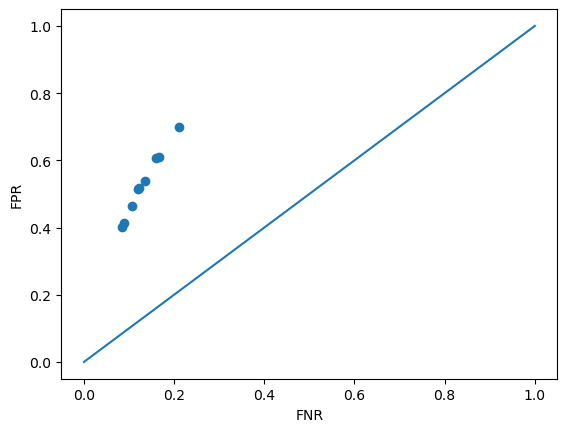

In [ ]:
nn = 9;
aa = np.zeros(nn)
bb = np.zeros(nn)
for k in range(nn):
    y_hat=predict(X_test, threshold=(k+0.5)*0.1)
    aa[k], bb[k] = true_false_positive(y_hat, y_test)
plt.scatter(bb,aa)
plt.plot([0, 1],[0, 1])
plt.xlabel('FNR')
plt.ylabel('FPR')

Text(0, 0.5, 'Feauture-2')

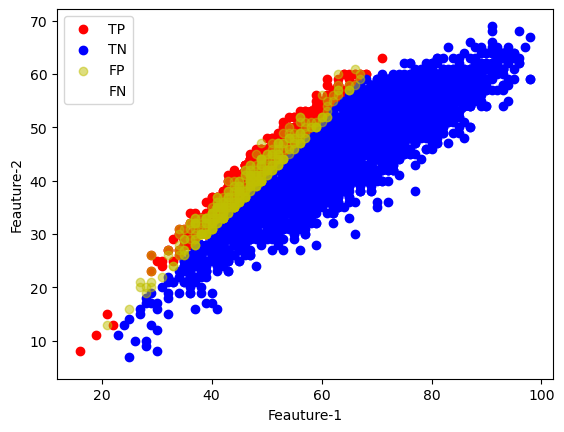

In [ ]:
true_positive = np.equal(y_hat, 1) & np.equal(y_test, 1)
true_negative = np.equal(y_hat, 0) & np.equal(y_test, 0)
false_positive = np.equal(y_hat, 1) & np.equal(y_test, 0)
false_negative = np.equal(y_hat, 0) & np.equal(y_test, 1)

plt.scatter(X_test[true_positive,0],X_test[true_positive,1],color='r',label='TP')
plt.scatter(X_test[true_negative,0],X_test[true_negative,1],color='b',label='TN')
plt.scatter(X_test[false_positive,0],X_test[false_positive,1],color='y', alpha=0.5,label='FP')
plt.scatter(X_test[false_negative,0],X_test[false_negative,1],color='g', alpha=0/.5,label='FN')
plt.legend()
plt.xlabel('Feauture-1')
plt.ylabel('Feauture-2')